In [20]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    ----------------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
#import plotly.express as px
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv("../Datasets/Student_Marks.csv")
data.head(10)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


In [7]:
data.tail(10)

,number_courses,time_study,Marks
90,7,4.182,24.394
91,8,2.730,19.564
92,4,5.027,23.916
93,8,6.471,42.426
94,8,3.919,24.451
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [8]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [9]:
data.count()   

number_courses    100
time_study        100
Marks             100
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [11]:
data["number_courses"].value_counts()

number_courses
3    22
4    21
6    16
8    16
7    15
5    10
Name: count, dtype: int64

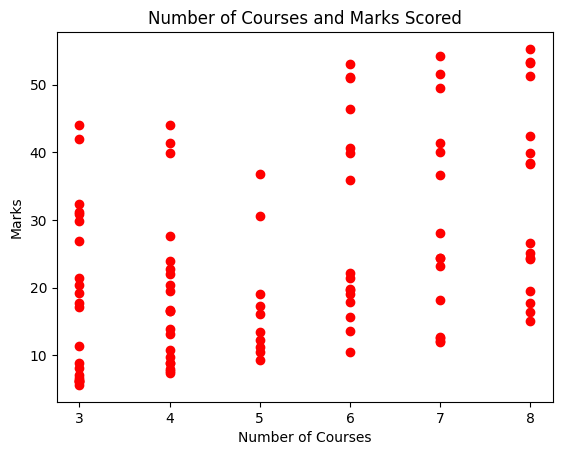

In [19]:
#figure = px.scatter(data_frame=data, x = "number_courses", 
 #                   y = "Marks", size = "time_study", 
  #                  title="Number of Courses and Marks Scored")
plt.scatter(data["number_courses"],data["Marks"] , c = "r")
plt.xlabel("Number of Courses")
plt.ylabel("Marks")
plt.title("Number of Courses and Marks Scored")
plt.show()

In [12]:
data.max(axis=0)

number_courses     8.000
time_study         7.957
Marks             55.299
dtype: float64

In [17]:
data.min(axis=0)

number_courses    3.000
time_study        0.096
Marks             5.609
dtype: float64

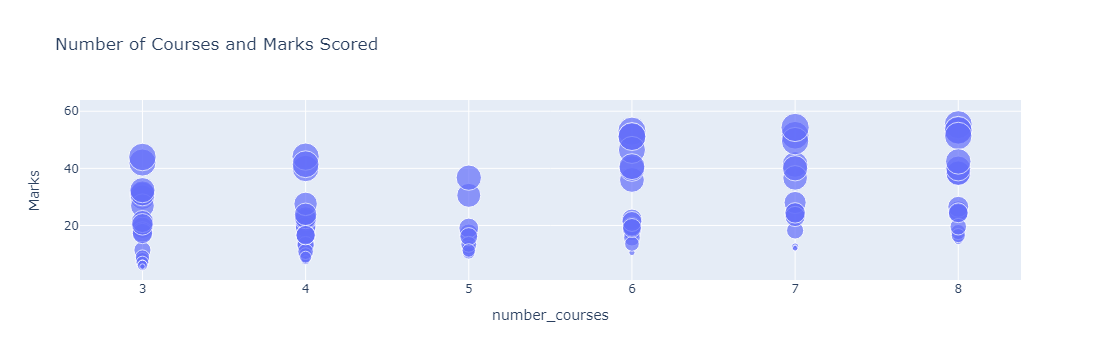

In [19]:
figure = px.scatter(data_frame=data, x = "number_courses", 
                    y = "Marks", size = "time_study", 
                    title="Number of Courses and Marks Scored")
figure.show()

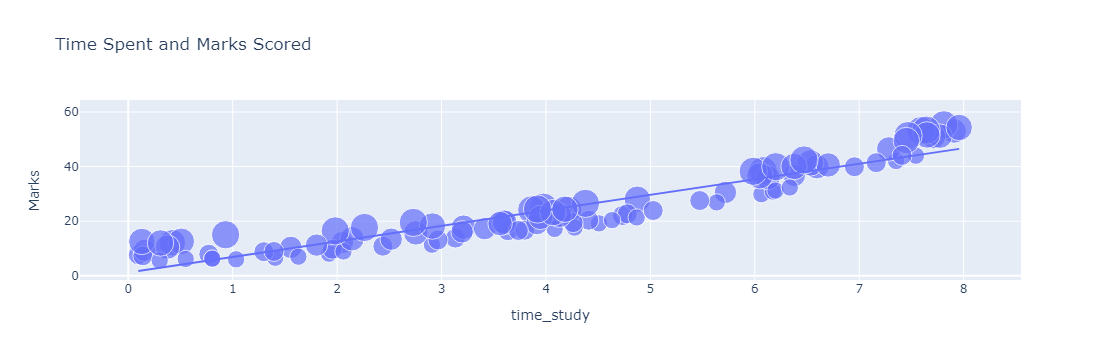

In [20]:
figure = px.scatter(data_frame=data, x = "time_study", 
                    y = "Marks", size = "number_courses", 
                    title="Time Spent and Marks Scored", trendline="ols")
figure.show()

In [14]:
correlation = data.corr()
print(correlation["Marks"].sort_values(ascending=False))

Marks             1.000000
time_study        0.942254
number_courses    0.417335
Name: Marks, dtype: float64


Ｓｔｕｄｅｎｔ   Ｍａｒｋｓ  Ｐｒｅｄｉｃｔｉｏｎ  Ｍｏｄｅｌ

In [16]:
x = np.array(data[["time_study", "number_courses"]])
y = np.array(data["Marks"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [17]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9459936100591211

In [28]:
features = np.array([[7.909, 6]])
model.predict(features)

array([45.50476836])

In [24]:
features = np.array([[6, 1]])
model.predict(features)

array([26.27773374])